In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets 
data = datasets.load_iris() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
df.head()


(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

[41 13]
[36 41]
[22 13]
[22 32]
[15 14]
[15 32]
[18 14]
[18 36]
----
[35  0]
[34  7]
[34 35]
[10  7]
[10 18]
[26  0]
[26 18]
----
[19  6]
[18 31]
[18 19]
[48  6]
[17 31]
[17 48]
----


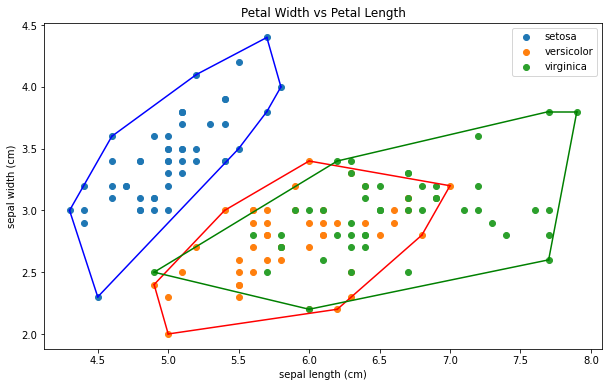

In [3]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = ConvexHull(bucket) #bagian ini diganti dengan hasil implementasi 
    # ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull.simplices:
        print(simplex)
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
    print("----")
plt.legend()

## 1

In [4]:
def det(x_1: float, y_1: float, x_2: float, y_2: float, x_3: float, y_3: float):
    return x_1*y_2 + x_3*y_1 + x_2*y_3 - x_3*y_2 - x_2*y_1 - x_1*y_3

In [5]:
det(1, 1, 0, 1, 2, 2)

-1

## 2

In [6]:
# 2

## 3

In [5]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [314]:
df_s = df[df["Target"] == 0]

## 4

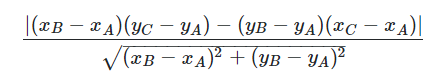

In [8]:
def distance(x_1: float, y_1: float, x_2: float, y_2:float, x_3: float, y_3: float):
    return abs((x_2-x_1)*(y_3-y_1) - (y_2-y_1)*(x_3-x_1))/((x_2-x_1)**2 + (y_2-y_1)**2)**(1/2)

In [315]:
def recursive(frame: pd.DataFrame, p_min: int, p_max: int, includes: list, col_x=None, col_y=None, name="", up=True):
    if len(includes) == 0:
        # Tidak ada titik antara p_min dan p_max, artinya titik p_min dan p_max membentuk garis convex hull
        return [[p_min, p_max]]
    elif len(includes) == 1:
        # Hanya ada 1 titik antara p_min dan p_max, artinya garis convex hull antara p_min dan p_max
        # dihubungkan oleh titik tersebut
        return [[p_min, includes[0]], [includes[0], p_max]]
    
    # Meng-exclude p_min dan p_max jika dalam suatu kasus masuk ke includes
    includes_set = set(includes) - {p_min, p_max}
    includes_list = list(includes_set)
    
    # kolom default
    if (col_x is None):
        col_x = frame.columns[0]
    if (col_y is None):
        col_y = frame.columns[1]
        
    x_pmin = frame.loc[p_min][col_x]
    y_pmin = frame.loc[p_min][col_y]
    
    x_pmax = frame.loc[p_max][col_x]
    y_pmax = frame.loc[p_max][col_y]
    
    max_distance_idx = distance(x_pmin, y_pmin, x_pmax, y_pmax, df_s.loc[includes_list][col_x], df_s.loc[includes_list][col_y]).idxmax()
    x_pmax_new = frame.loc[max_distance_idx][col_x]
    y_pmax_new = frame.loc[max_distance_idx][col_y]
    
    includes_set = set(includes_list) - {max_distance_idx}
    includes_list = list(includes_set)
    
    print("pmin pmax pmax_new:", p_min, p_max, max_distance_idx)
    new_includes_1 = []
    new_includes_2 = []
    for i, row in frame[[col_x, col_y]].loc[includes_list].iterrows():
        if (x_pmin < x_pmax):
            indicator_1 = det(x_pmin, y_pmin, x_pmax_new, y_pmax_new, row[col_x], row[col_y])
        else:
            indicator_1 = det(x_pmax_new, y_pmax_new, x_pmin, y_pmin, row[col_x], row[col_y])
        if (x_pmax < x_pmax_new):
            indicator_2 = det(x_pmax, y_pmax, x_pmax_new, y_pmax_new, row[col_x], row[col_y])
        else:
            indicator_2 = det(x_pmax_new, y_pmax_new, x_pmax, y_pmax, row[col_x], row[col_y])
            
        if up:
            if indicator_1 > 0:
                new_includes_1.append(i)
            if indicator_2 > 0:
                new_includes_2.append(i)
        else: 
            if indicator_1 < 0:
                new_includes_1.append(i)
            if indicator_2 < 0:
                new_includes_2.append(i)
                
    print("includes:", includes_list)
    print("new includes 1:", new_includes_1)
    print("new includes 2:", new_includes_2)
    
    res_S1 = recursive(frame, p_min, max_distance_idx, new_includes_1, name=name+"S1", up=up)
    res_S2 = recursive(frame, max_distance_idx, p_max, new_includes_2, name=name+"S2", up=up)
    
    return res_S1 + res_S2


def myConvexHull(frame: pd.DataFrame, col_x=None, col_y=None):
    if (col_x is None):
        col_x = frame.columns[0]
    if (col_y is None):
        col_y = frame.columns[1]
        
    # search for row where the x is min
    min_data = frame[frame[col_x] == frame[col_x].min()]
    min_x = list(min_data[col_x])[0]
    min_y = list(min_data[col_y])[0]

    # search for row where the x is max
    max_data = frame[frame[col_x] == frame[col_x].max()]
    max_x = list(max_data[col_x])[0]
    max_y = list(max_data[col_y])[0]
    
    S1 = []
    S2 = []
    for i, row in frame[[col_x, col_y]].loc[list(set(df_s.index) - {max_data.index[0], min_data.index[0]})].iterrows():
        res = det(min_x, min_y, max_x, max_y, row[col_x], row[col_y])
        if res > 0:
            S1.append(i)
        elif res < 0:
            S2.append(i)
            
    print(S1)
    print(S2)
    res_S1 = recursive(frame, min_data.index[0], max_data.index[0], S1, name="S1")
    res_S2 = recursive(frame, min_data.index[0], max_data.index[0], S2, name="S2", up=False)
    return res_S1 + res_S2
    
indices = myConvexHull(df_s)

[136, 138, 144, 148, 149, 100, 109, 110, 115, 117, 124]
[128, 129, 130, 132, 133, 134, 135, 137, 139, 140, 141, 142, 143, 145, 146, 147, 101, 102, 103, 104, 105, 107, 108, 111, 112, 113, 114, 116, 118, 119, 120, 121, 122, 123, 125, 126, 127]

S1
pmin pmax pmax_new: 106 131 148
includes: [100, 136, 138, 109, 110, 144, 115, 149, 117, 124]
new includes 1: []
new includes 2: [117]

S1S1

S1S2

S2
pmin pmax pmax_new: 106 131 118
includes: [128, 129, 130, 132, 133, 134, 135, 137, 139, 140, 141, 142, 143, 145, 146, 147, 101, 102, 103, 104, 105, 107, 108, 111, 112, 113, 114, 116, 119, 120, 121, 122, 123, 125, 126, 127]
new includes 1: [146, 108, 113, 119]
new includes 2: []

S2S1
pmin pmax pmax_new: 106 118 119
includes: [113, 146, 108]
new includes 1: []
new includes 2: []

S2S1S1

S2S1S2

S2S2


In [11]:
x_col = df_s.columns[0]
y_col = df_s.columns[1]
# indices = [6, 13, 14, 22, 42, 42, 42, 32]

In [307]:
indices

[[13, 22],
 [22, 32],
 [32, 15],
 [15, 14],
 [13, 41],
 [41, 36],
 [36, 18],
 [18, 14]]

In [79]:
lines = list(filter(lambda x: type(x) == list, indices))

[106, 148]
[148, 117]
[117, 131]
[106, 119]
[119, 118]
[118, 131]


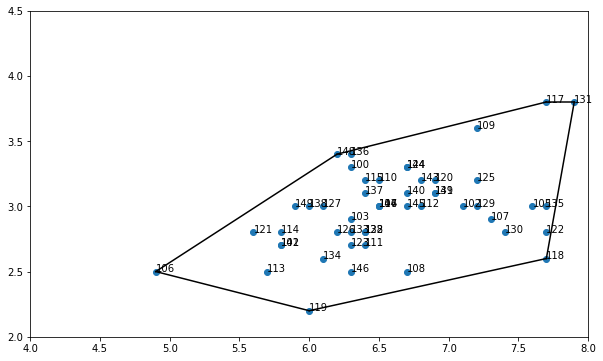

In [316]:
plt.figure(figsize=(10, 6))
plt.scatter(df_s[x_col], df_s[y_col])
# plt.scatter(df_s.loc[indices][x_col], df_s.loc[indices][y_col], color="red")
for i, d in df_s[[x_col, y_col]].iterrows():
#     if i in indices:
        plt.annotate(i, (d[x_col], d[y_col]))
for l in indices:
    print(l)
    plt.plot(df_s[[x_col]].loc[l].values, df_s[[y_col]].loc[l].values, color="black")
# plt.plot(df_s[[x_col, y_col]].loc[list(lines[0])])
plt.ylim(2.0, 4.5)
plt.xlim(4.0, 8.0)

plt.show()

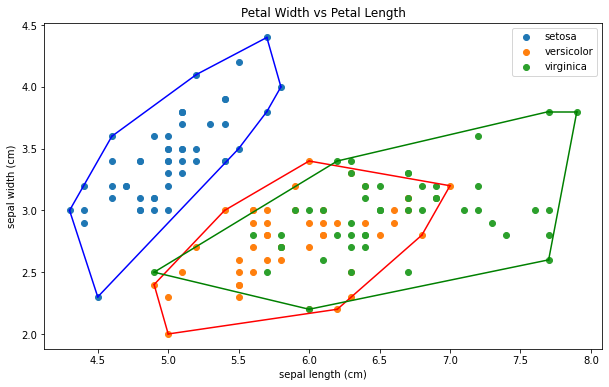